In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
data_test=pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Quick Look at the data

In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Visualize Data

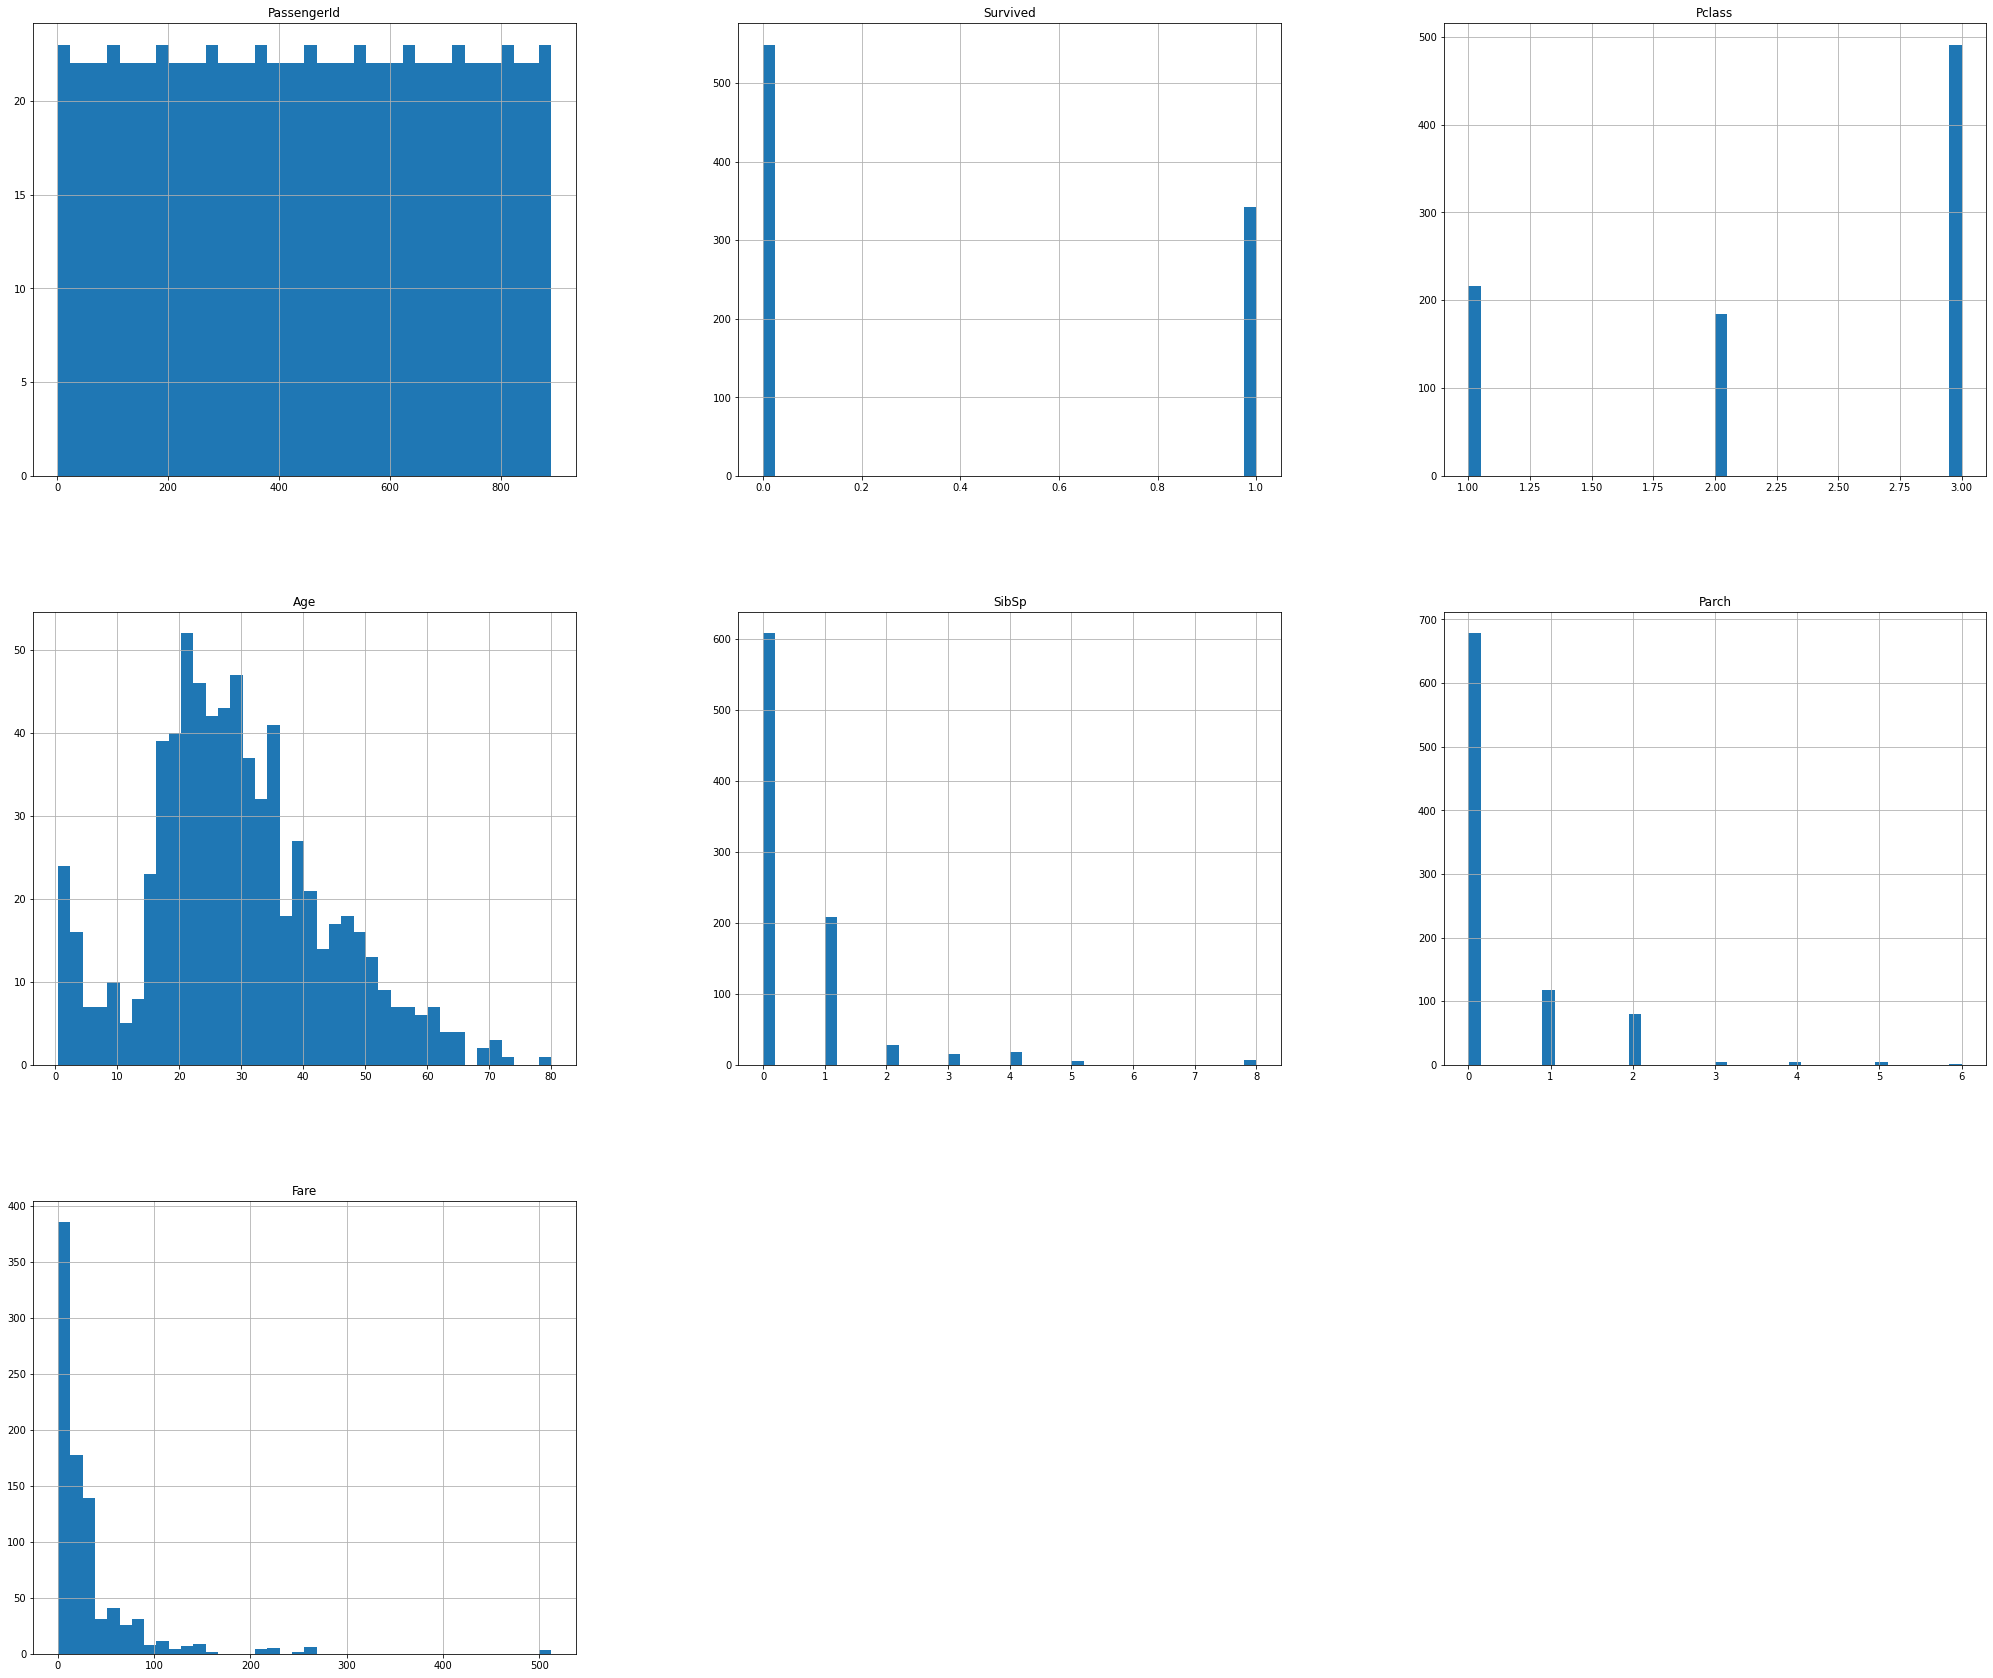

In [ ]:
data.hist(figsize = (35,30), bins = 40)
plt.show()

## Correlation

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

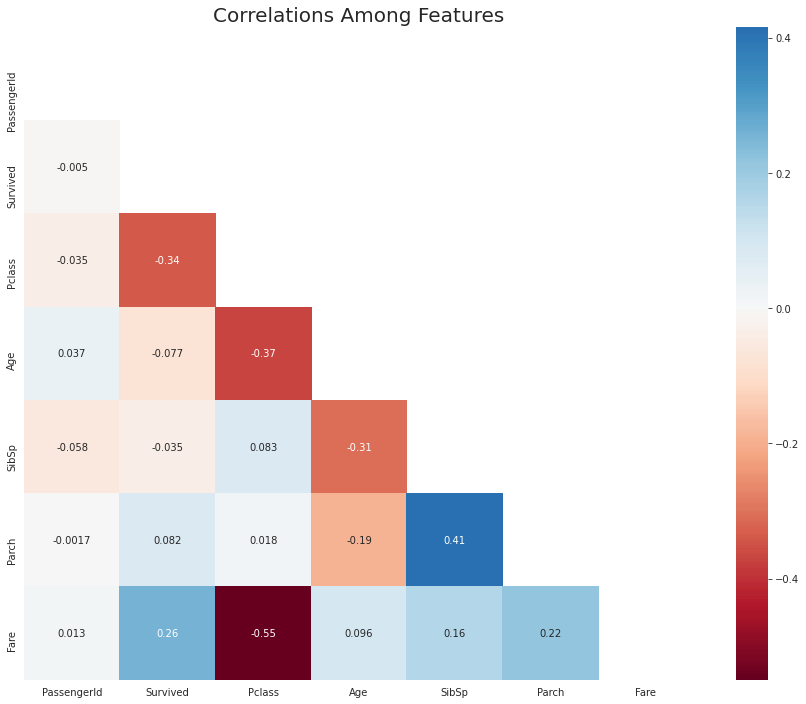

In [ ]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            center = 0)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

### Inference
From the histograms of features, we find that Age has a ***positive skewness*** to some extent. While the other features such as Sibsp, Parch, and Fare have almost the same shapes. That is a shape that decreases as we move along the x axis
```
The correlations we see are 


*   Fare and P-class have a significant correlation with Survived
*   P-class has a significant correlation with Age and Fare of the person
*   The age has a significant correlation with the Sibsp and Parch
*   PArch has a significant correlation with SibSp and F

```
Correlations above 0.1 in magnitude
> Fare v Survivev<br>
> Pclass v Survive<br>
> Pclass v Fare<br>
> Pclass v Age<br>
> Age v SibSp<br>
> Age v Parch<br>
> Sibsp v Fare<br>
> Sibsp v Parch<br>
> Parch v Fare<br>




## Statistical Inference

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data[["Survived","Pclass","Age","SibSp","Parch","Fare"]].groupby(["Survived"],as_index=False).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Categorial Data

### Histograms

Text(0.5, 1.0, 'Pclass Not Survived')

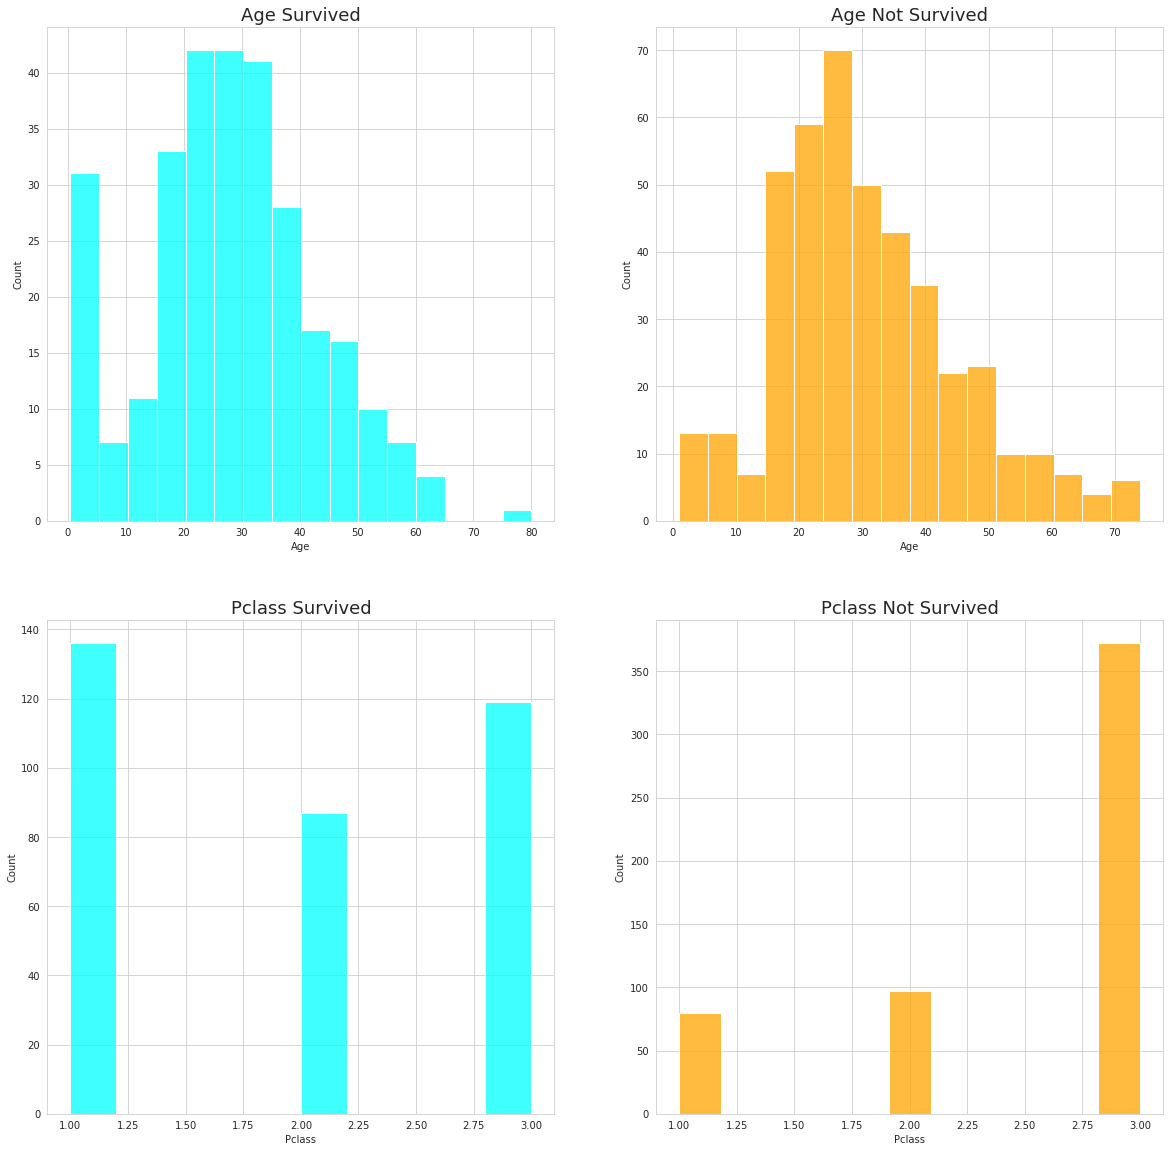

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.histplot(x=data.loc[(data['Survived'] == 1),'Age'] ,label='survived',ax=ax[0,0],color='cyan')
sns.histplot(x=data.loc[(data['Survived'] == 0),'Age'] ,label='survived',ax=ax[0,1],color='orange')
ax[0,0].set_title("Age Survived",fontsize=18)
ax[0,1].set_title("Age Not Survived",fontsize=18)

sns.histplot(x=data.loc[(data['Survived'] == 1),'Pclass'] ,label='survived',ax=ax[1,0],color='cyan')
sns.histplot(x=data.loc[(data['Survived'] == 0),'Pclass'] ,label='survived',ax=ax[1,1],color='orange')
ax[1,0].set_title("Pclass Survived",fontsize=18)
ax[1,1].set_title("Pclass Not Survived",fontsize=18)



### Bar Graphs

'Survived'

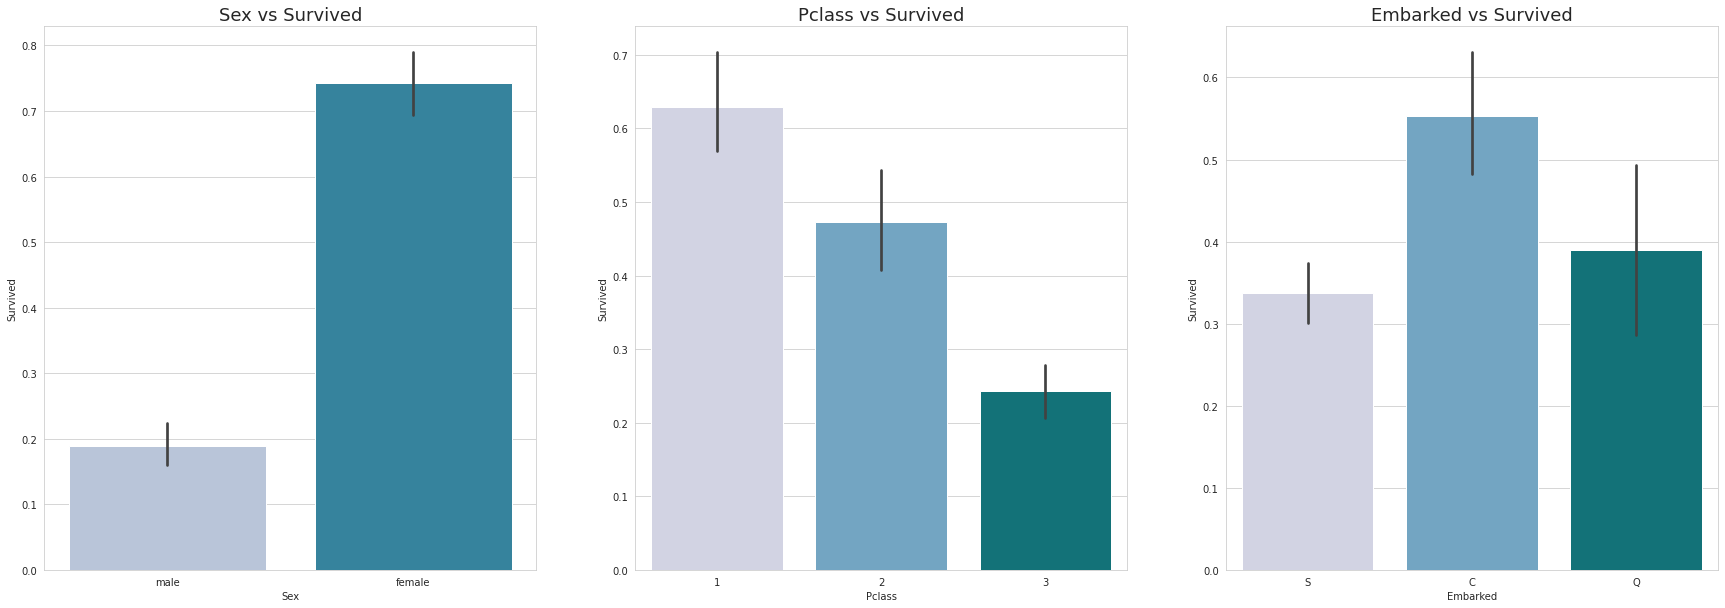

In [ ]:
f, ax = plt.subplots(nrows=1,ncols=3, figsize=(30,10))
sns.barplot(x="Sex",y="Survived",data=data,ax=ax[0],palette=("PuBuGn"))
ax[0].set_title("Sex vs Survived",fontsize=18)
ax[0].get_xlabel()
ax[0].get_ylabel()

sns.barplot(x="Pclass",y="Survived",data=data,ax=ax[1],palette=("PuBuGn"))
ax[1].set_title("Pclass vs Survived",fontsize=18)
ax[1].get_xlabel()
ax[1].get_ylabel()

sns.barplot(x="Embarked",y="Survived",data=data,ax=ax[2],palette=("PuBuGn"))
ax[2].set_title("Embarked vs Survived",fontsize=18)
ax[2].get_xlabel()
ax[2].get_ylabel()


### Count plots

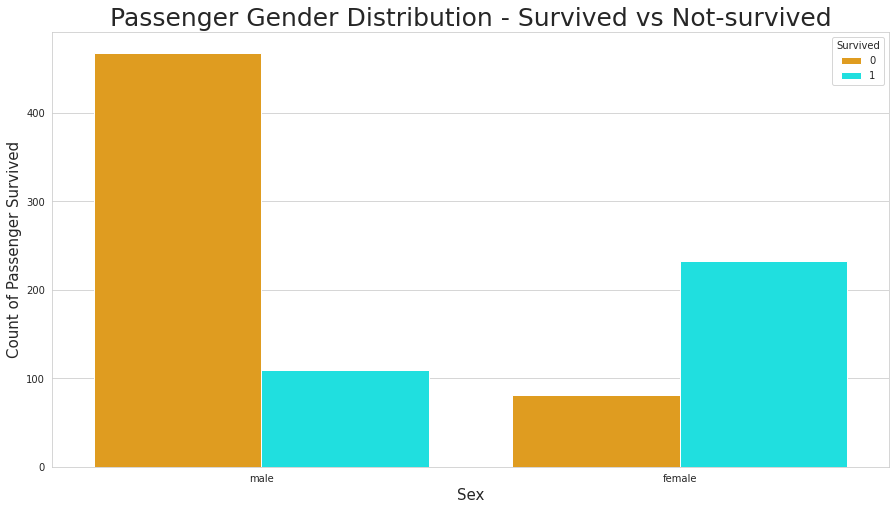

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = data, 
                   palette = {1:"cyan", 0:"orange"}
)

ax.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Sex", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

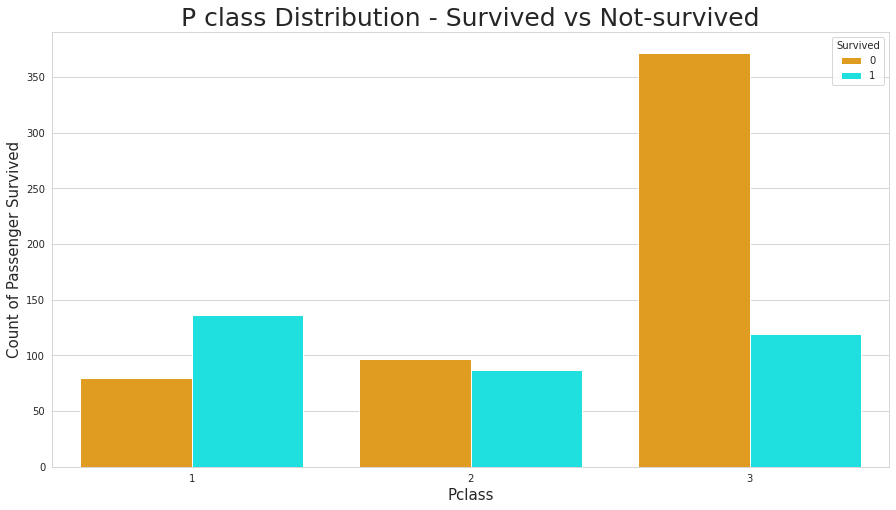

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Pclass", 
                   hue="Survived",
                   data = data, 
                   palette =  {1:"cyan", 0:"orange"}
)

ax.set_title("P class Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Pclass", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

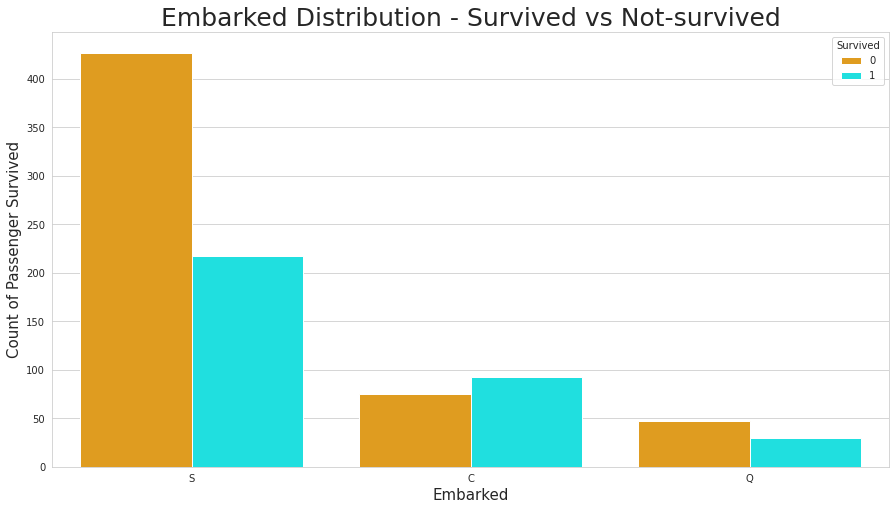

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Embarked", 
                   hue="Survived",
                   data = data,  
                   palette = {1:"cyan", 0:"orange"}
)

ax.set_title("Embarked Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Embarked", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

### Inference
From the bar graphs above we can infer alot of data. The key aspects are:


*   Almost 75% of females survived 
*   A mere 18% of the males survived
*   Out of all the P-classes, people belonging to class 1 had the highest probability to survive.
*   About 62% of the class 1 inhabitants survived. 
*   About 55% of the people belonging to C embarkment survived
*   About 33% of the people belonging to S embarkment survived
*   About 39% of the people belonging to Q embarkment survived

We gather more detailed insights from the count plots<br>
> ->  The number of males who did not survive is almost 4 times the number of people who survived<br>
> ->  The number of females who did survive is almost 2.5 times the number of people who not survived<br>
> ->The number of people in class 3 who did not survive is almost 3 times the number of people who survived<br>
> ->The number of people in class 2 and class 1 who did  survive is almost the same as the number of people who survived<br>
->The number of people in S embarkment who did not survive is almost 2 times the number of people who survived<br>
> ->The number of people in C embarkment and Q embarkment who did  survive is almost the same as the number of people who survived<br>







## Numeric Data

### Kdeplots

Text(0.5, 1.0, 'Parch vs Survived')

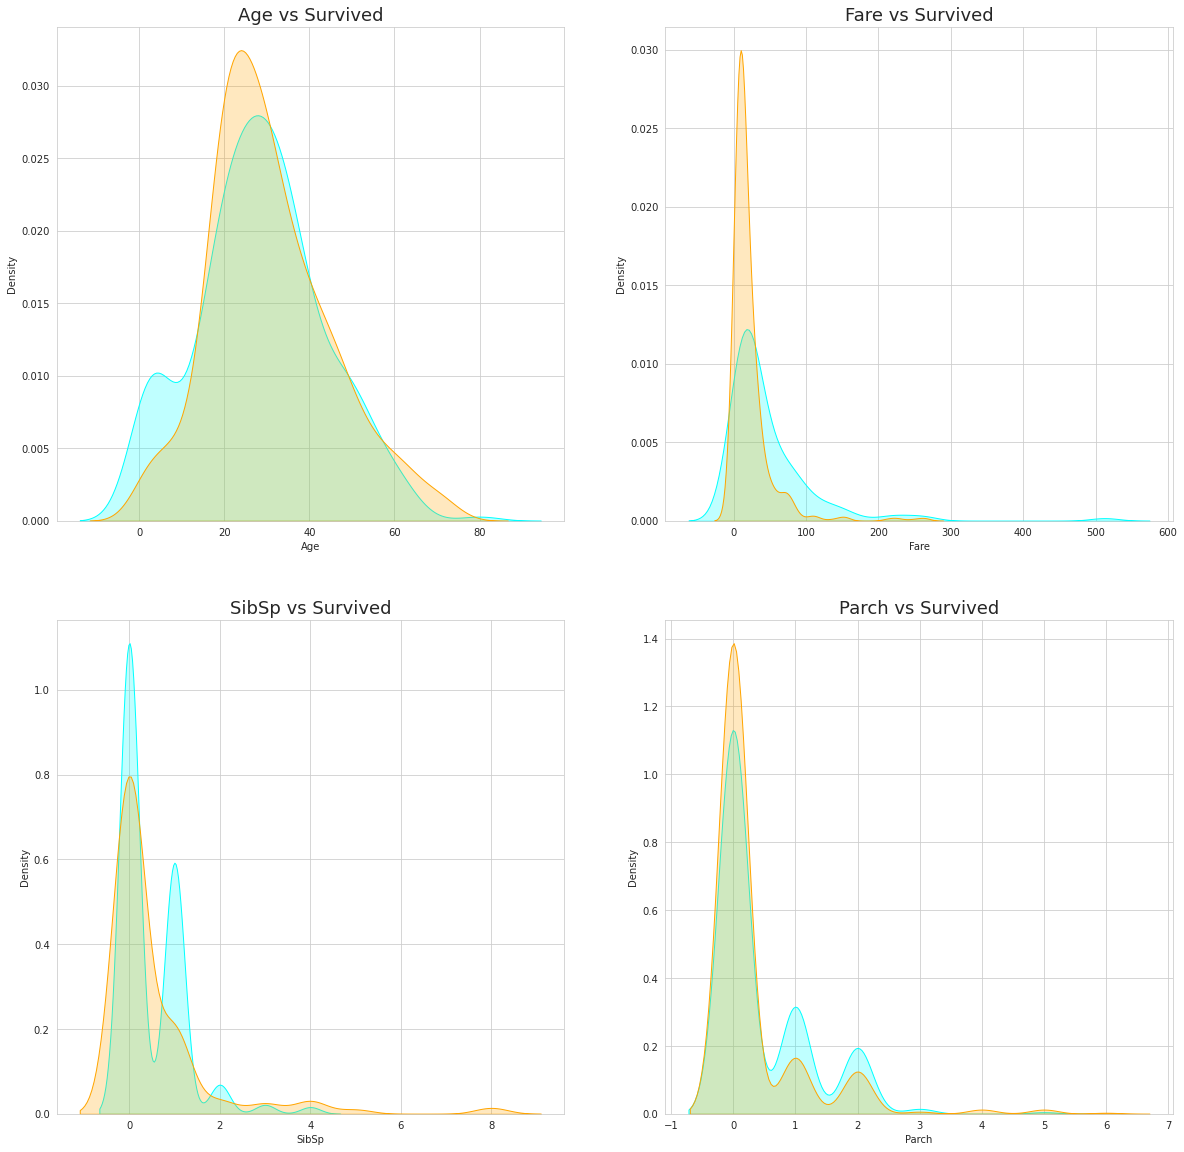

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Age'] ,label='survived',shade=True,ax=ax[0,0],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Age'] ,label='survived',shade=True,ax=ax[0,0],color='orange')
ax[0,0].set_title("Age vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Fare'] ,label='survived',shade=True,ax=ax[0,1],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Fare'] ,label='survived',shade=True,ax=ax[0,1],color='orange')
ax[0,1].set_title("Fare vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'SibSp'] ,label='survived',shade=True,ax=ax[1,0],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'SibSp'] ,label='survived',shade=True,ax=ax[1,0],color='orange')
ax[1,0].set_title("SibSp vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Parch'] ,label='survived',shade=True,ax=ax[1,1],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Parch'] ,label='survived',shade=True,ax=ax[1,1],color='orange')
ax[1,1].set_title("Parch vs Survived",fontsize=18)


## Visualizing correlated data

### Line plots

Text(0.5, 1.0, 'SibSp vs Parch')

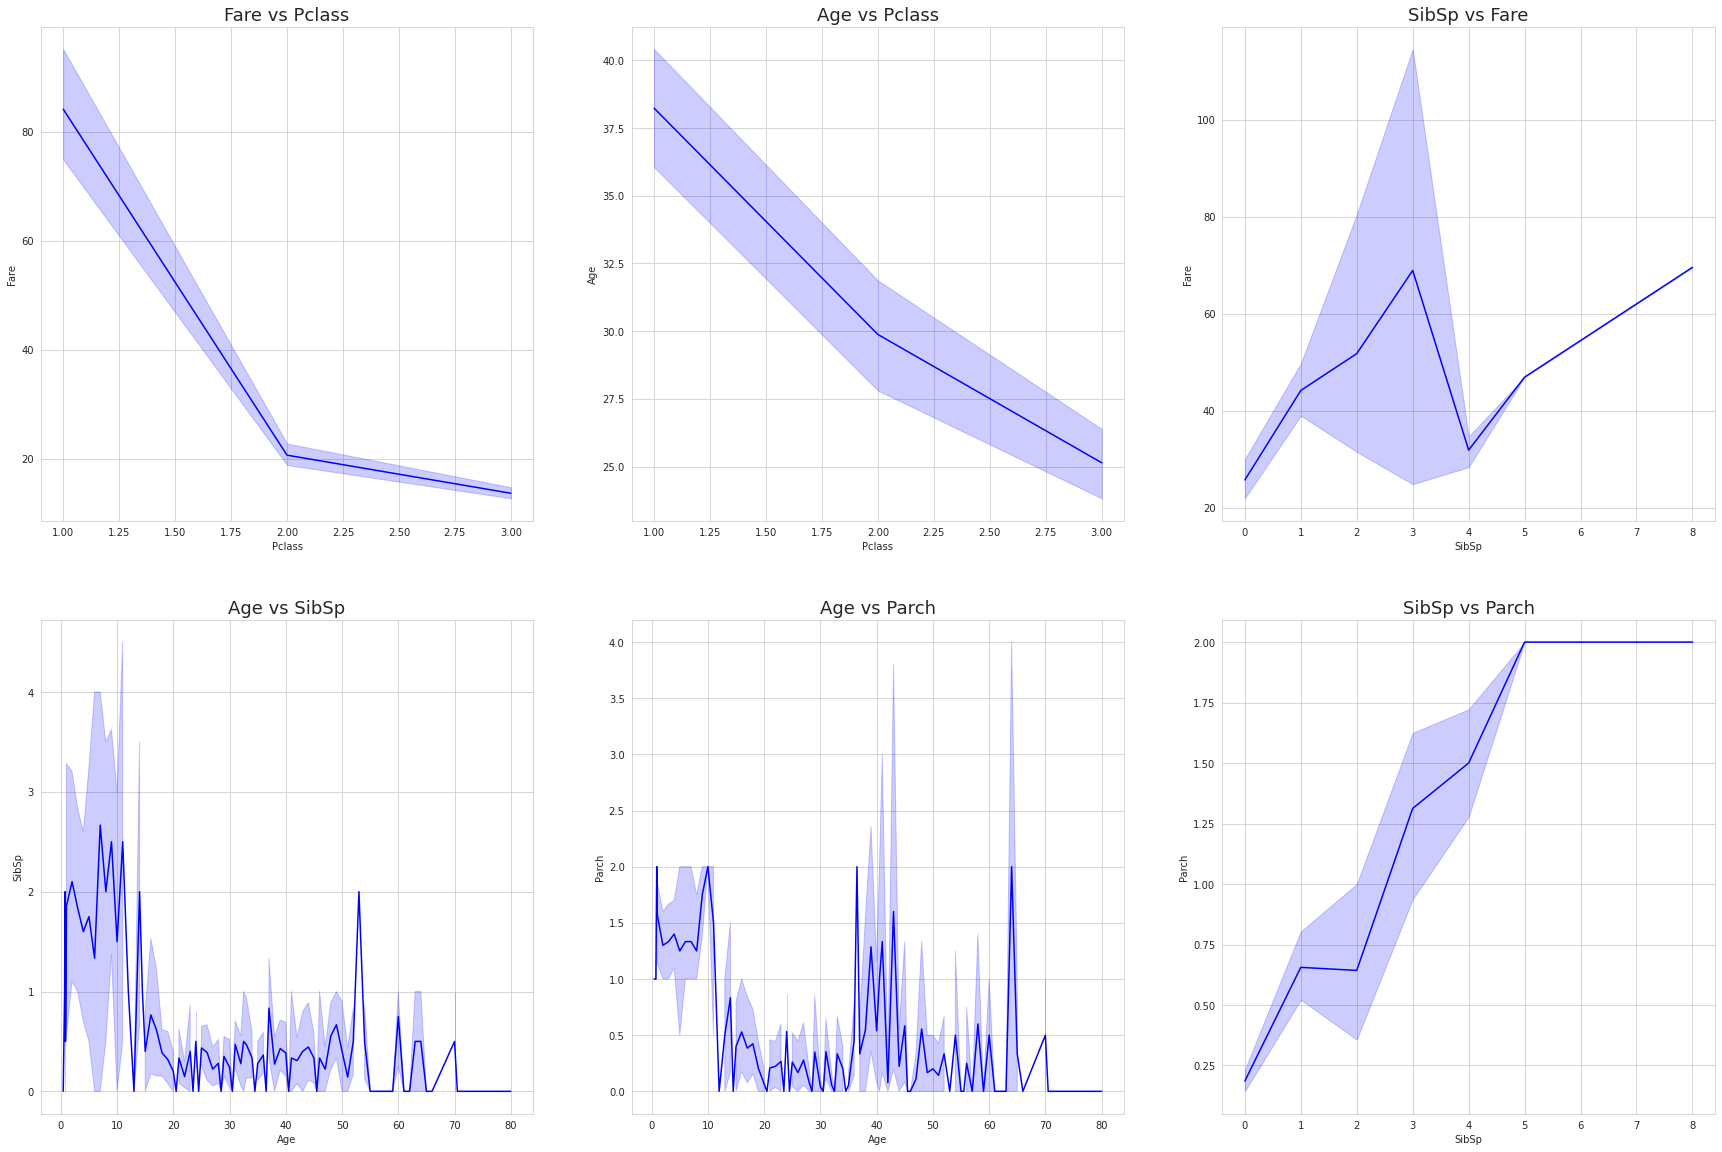

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
sns.lineplot(x="Pclass",y="Fare",data=data,ax=ax[0,0],color='blue')
ax[0,0].set_title("Fare vs Pclass",fontsize=18)

sns.lineplot(x="Pclass",y="Age",data=data,ax=ax[0,1],color='blue')
ax[0,1].set_title("Age vs Pclass",fontsize=18)

sns.lineplot(x="SibSp",y="Fare",data=data,ax=ax[0,2],color='blue')
ax[0,2].set_title("SibSp vs Fare",fontsize=18)

sns.lineplot(x="Age",y="SibSp",data=data,ax=ax[1,0],color='blue')
ax[1,0].set_title("Age vs SibSp",fontsize=18)

sns.lineplot(x="Age",y="Parch",data=data,ax=ax[1,1],color='blue')
ax[1,1].set_title("Age vs Parch",fontsize=18)

sns.lineplot(x="SibSp",y="Parch",data=data,ax=ax[1,2],color='blue')
ax[1,2].set_title("SibSp vs Parch",fontsize=18)

### Bloxplots

Text(0.5, 1.0, 'SibSp vs Parch')

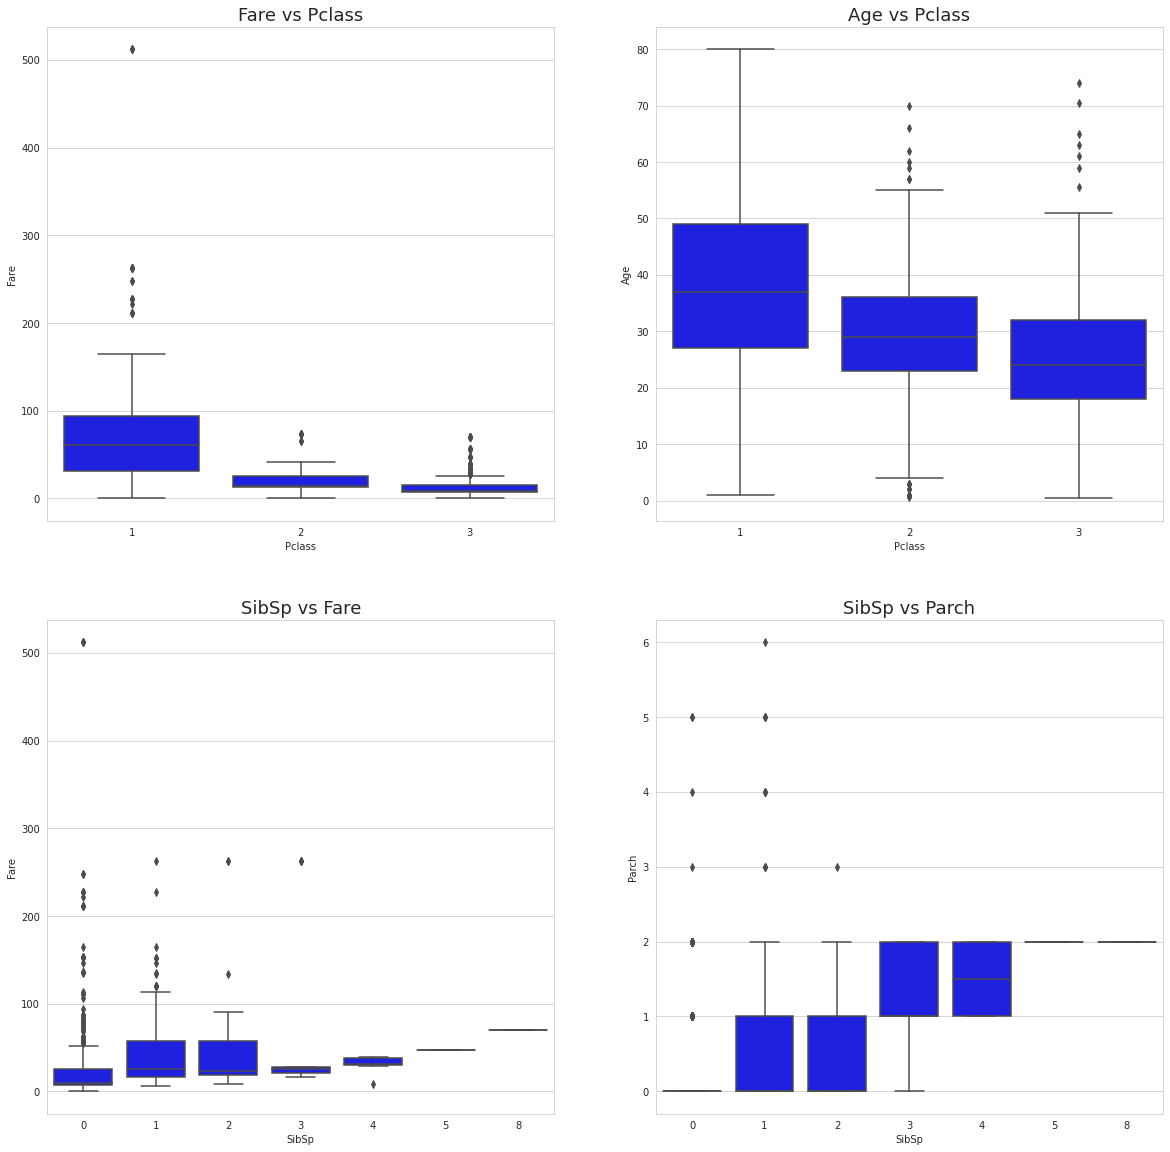

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.boxplot(x="Pclass",y="Fare",data=data,ax=ax[0,0],color='blue')
ax[0,0].set_title("Fare vs Pclass",fontsize=18)

sns.boxplot(x="Pclass",y="Age",data=data,ax=ax[0,1],color='blue')
ax[0,1].set_title("Age vs Pclass",fontsize=18)

sns.boxplot(x="SibSp",y="Fare",data=data,ax=ax[1,0],color='blue')
ax[1,0].set_title("SibSp vs Fare",fontsize=18)

sns.boxplot(x="SibSp",y="Parch",data=data,ax=ax[1,1],color='blue')
ax[1,1].set_title("SibSp vs Parch",fontsize=18)

# Data Cleaning 

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Replacing missing Age values

In [ ]:
mean_vals=data[["Sex","Pclass","Age"]].groupby(["Sex","Pclass"]).mean()
mean_vals_test=data_test[["Sex","Pclass","Age"]].groupby(["Sex","Pclass"]).mean()

In [ ]:
mean_vals_test

Age
Sex    Pclass           
female 1       41.333333
       2       24.376552
       3       23.073400
male   1       40.520000
       2       30.940678
       3       24.525104

In [ ]:
mean_vals

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

In [ ]:
num=0
for sex in ['male','female']:
  for pclass in [1,2,3]:
    data_test.loc[(data_test["Age"].isnull())&(data_test["Sex"]==sex) & (data_test["Pclass"]==pclass),"Age" ]=mean_vals_test.iloc[num]["Age"]
    num+=1

In [ ]:
num=0
for sex in ['male','female']:
  for pclass in [1,2,3]:
    data.loc[(data["Age"].isnull())&(data["Sex"]==sex) & (data["Pclass"]==pclass),"Age" ]=mean_vals.iloc[num]["Age"]
    num+=1

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data["Age"].isnull().sum()

0

In [ ]:
data.iloc[31]

PassengerId                                                32
Survived                                                    1
Pclass                                                      1
Name           Spencer, Mrs. William Augustus (Marie Eugenie)
Sex                                                    female
Age                                                   41.2814
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17569
Fare                                                  146.521
Cabin                                                     B78
Embarked                                                    C
Name: 31, dtype: object

## Replacing missing Embarked values

In [ ]:
data[["Sex","Pclass","Embarked"]].groupby(["Sex","Pclass"]).agg(lambda x:x.value_counts().index[0])

Embarked
Sex    Pclass         
female 1             S
       2             S
       3             S
male   1             S
       2             S
       3             S

In [ ]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


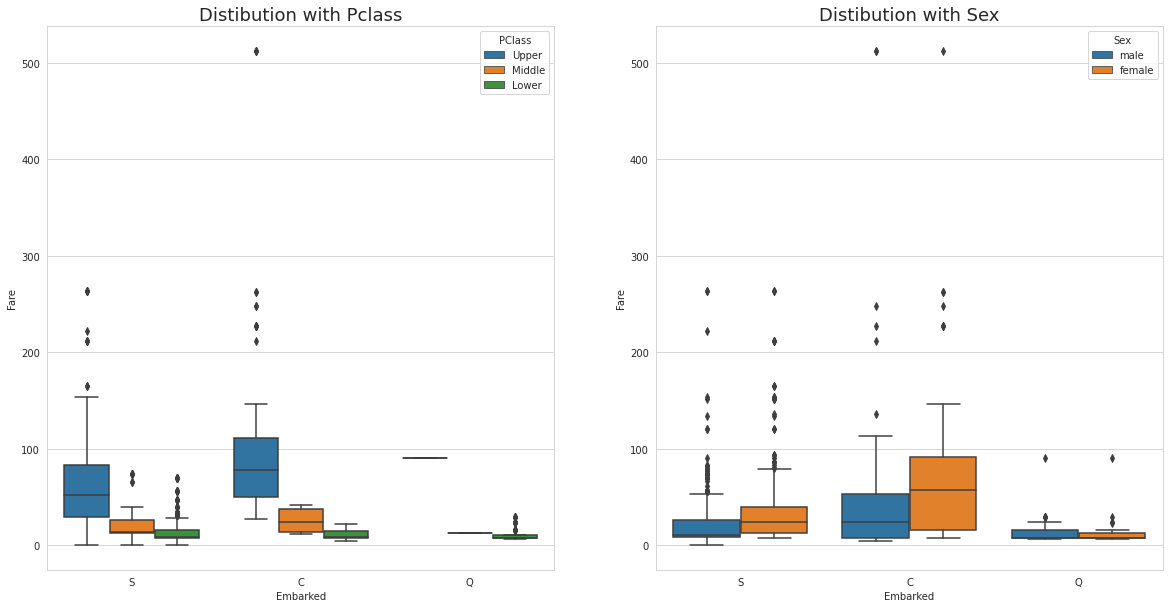

In [ ]:
fig,ax =plt.subplots(figsize=(20,10),ncols=2)
temp=sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data,ax=ax[0])
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=data,ax=ax[1])
ax[0].set_title("Distibution with Pclass",fontsize=18)
ax[1].set_title("Distibution with Sex",fontsize=18)


leg_1 = temp.get_legend()
leg_1.set_title("PClass")
legs = leg_1.texts
legs[0].set_text('Upper')
legs[1].set_text('Middle')
legs[2].set_text('Lower')

In [ ]:
data["Embarked"].fillna("C", inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() ## As cabins have a low corr we can drop them later

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Feature Engineering

In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Making new feature family size

In [ ]:
data["fam_size"]=data["SibSp"]+data["Parch"]+1.0

In [ ]:
data_test["fam_size"]=data_test["SibSp"]+data["Parch"]+1

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


## Converting Pclass to catgories

In [ ]:
data.head() # Male=1 and female =0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
bin1=OneHotEncoder()
bin_test=OneHotEncoder()
feat1=pd.DataFrame(bin1.fit_transform(data["Pclass"].values.reshape(-1,1)).toarray())
feat2=pd.DataFrame(bin_test.fit_transform(data_test["Pclass"].values.reshape(-1,1)).toarray())

In [ ]:
for i in range(len(feat1.columns)):
  data["Pclass_"+str(i+1)]=feat1[i]

In [ ]:
for i in range(len(feat2.columns)):
  data_test["Pclass_"+str(i+1)]=feat2[i]

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,1.0


In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,0.0,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
bin3=OneHotEncoder()
bin3_test=OneHotEncoder()
feat3=pd.DataFrame(bin1.fit_transform(data["Sex"].values.reshape(-1,1)).toarray(),columns=['Female', 'Male'])
feat3_test=pd.DataFrame(bin_test.fit_transform(data_test["Sex"].values.reshape(-1,1)).toarray(),columns=['Female', 'Male'])

In [ ]:
data=pd.concat([data,feat3],axis=1)
data_test=pd.concat([data,feat3_test],axis=1)

## Categorizing Embarked

In [ ]:
data_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
fam_size         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Female           0
Male             0
Female         473
Male           473
dtype: int64

In [ ]:
bin2=OneHotEncoder()
bin2_test=OneHotEncoder()
feat2=pd.DataFrame(bin2.fit_transform(data["Embarked"].values.reshape(-1,1)).toarray(),columns=['C', 'Q', 'S'])
feat2_test=pd.DataFrame(bin2_test.fit_transform(data_test["Embarked"].values.reshape(-1,1)).toarray(),columns=['C', 'Q', 'S'])
feat2_test

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
data=pd.concat([data,feat2],axis=1)
data_test=pd.concat([data_test,feat2_test],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3,Female,Male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3,Female,Male,Female,Male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Dropping the data that is not needed

In [ ]:
data.drop(["Sex","PassengerId","Cabin","SibSp","Parch","Ticket","Pclass","Name","Embarked"],axis=1,inplace=True)

In [ ]:
data_test.drop(["Sex","PassengerId","Cabin","SibSp","Parch","Ticket","Pclass","Name","Embarked"],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Age,Fare,fam_size,Pclass_1,Pclass_2,Pclass_3,Female,Male,C,Q,S
0,0,22.0,7.2500,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Model Engineering

In [ ]:
X=data.drop(["Survived"],axis=1)
Y=data["Survived"]
scores=[]

In [ ]:
X.shape, Y.shape

((891, 11), (891,))

## Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5)
scores.append(cross_val_score(clf, X, Y, cv=skf).mean()) 

In [ ]:
scores

[0.7980164459230432]

## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
scores.append(cross_val_score(knn, X, Y, cv=skf).mean())

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
scores.append(cross_val_score(gnb, X, Y, cv=skf).mean())


## SVC

In [ ]:
from sklearn.svm import SVC
svc=SVC()
scores.append(cross_val_score(svc, X, Y, cv=skf).mean())


## LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC(max_iter=100000)
scores.append(cross_val_score(lsvc, X, Y, cv=skf).mean())


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
per=Perceptron()
scores.append(cross_val_score(per, X, Y, cv=skf).mean())



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
scores.append(cross_val_score(decisiontree, X, Y, cv=skf).mean())

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
scores.append(cross_val_score(randomforest, X, Y, cv=skf).mean())

## SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
scores.append(cross_val_score(sgd, X, Y, cv=skf).mean())

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
scores.append(cross_val_score(gbk, X, Y, cv=skf).mean())

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000)
scores.append(cross_val_score(mlp, X, Y, cv=skf).mean())

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
scores.append(cross_val_score(ada, X, Y, cv=skf).mean())

# Overall Model scores

In [ ]:
algos="LogisticRegression KNeighborsClassifier GaussianNB SVC LinearSVC Perceptron DecisionTreeClassifier RandomForestClassifier SGDClassifier GradientBoostingClassifier MLPClassifier AdaBoostClassifier"
algos=algos.split(" ")
final=[algos,scores]

In [ ]:
view=pd.DataFrame(final).transpose()
view.columns=["Algo","Score"]
view.sort_values("Score",ascending=False)

,Algo,Score
9,GradientBoostingClassifier,0.829421
7,RandomForestClassifier,0.809234
11,AdaBoostClassifier,0.80811
10,MLPClassifier,0.806961
0,LogisticRegression,0.798016
4,LinearSVC,0.795738
2,GaussianNB,0.78904
6,DecisionTreeClassifier,0.778934
8,SGDClassifier,0.733978
1,KNeighborsClassifier,0.701475


# Fine tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
    'learning_rate':[0.1,0.5,0.01,0.05],
    'n_estimators':[100,500,1000,5000],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'max_depth':[3,5],
    'max_features':('auto', 'sqrt', 'log2'),
    'tol':[0.001,0.005,0.01],
    'n_iter_no_change':[None,42]


}

In [ ]:
fin_clf=GridSearchCV(gbk,param_grid=parameters)

In [ ]:
cross_val_score(fin_clf, X, Y, cv=skf).mean()

In [ ]:
gbk.max_features_